# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the dataset to a Pandas DataFrame
df=pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# EDA

C:\Users\NOMII\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


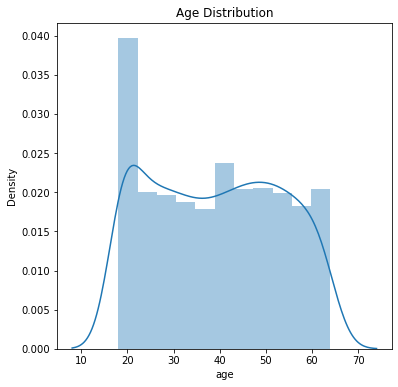

In [7]:
# distribution of age value
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

C:\Users\NOMII\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI Distribution')

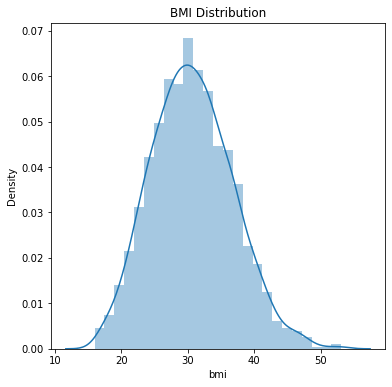

In [8]:
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')

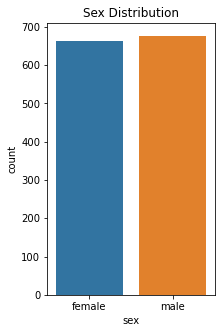

In [9]:
plt.figure(figsize=(3,5))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [10]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

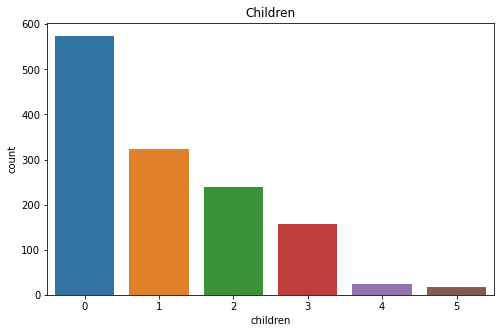

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

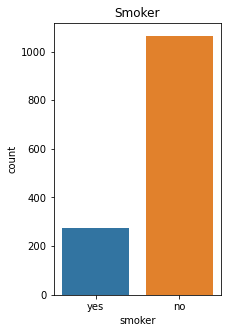

In [12]:
plt.figure(figsize=(3,5))
sns.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

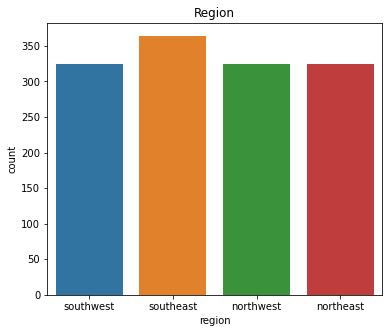

In [13]:
plt.figure(figsize=(6,5))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

In [14]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:>

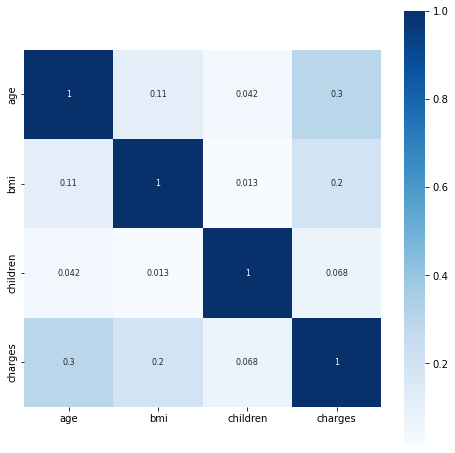

In [15]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cbar=True, square=True,  annot = True, annot_kws={'size':8}, cmap = 'Blues')

# Data Preprocessing

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [17]:
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [19]:
#Splitting the Features and Targe
X = df.drop(columns='charges', axis=1)
y = df[['charges']]

In [20]:
sc=StandardScaler()
X=sc.fit_transform(X)

# Train & Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
X.shape, X_train.shape, X_test.shape

((1338, 6), (936, 6), (402, 6))

In [23]:
y.shape, y_train.shape, y_test.shape

((1338, 1), (936, 1), (402, 1))

# Model Fitting

In [24]:
# Model libraries
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [25]:
#1. Linear Regression -
LR_model = LinearRegression()

#Fitting training set to the model
LR_model.fit(X_train,y_train)

#Predicting the test set results based on the model
# accuracy on training data
lr_y_pred = LR_model.predict(X_train)
score = LR_model.score(X_train,y_train)
print('Training Accuracy of LR model is ', score)

# accuracy on testing data
lr_y_pred_test = LR_model.predict(X_test)
score = LR_model.score(X_test,y_test)
print('Testing Accuracy of LR model is ', score)

Training Accuracy of LR model is  0.7316305418008456
Testing Accuracy of LR model is  0.7866250719879422


In [26]:
#2. SVM Model
svm_model = SVR(kernel='linear')

#Fitting training set to the model
svm_model.fit(X_train,y_train)

#Predicting the test set results based on the model
# accuracy on training data
svm_y_pred = svm_model.predict(X_train)
score = svm_model.score(X_train,y_train)
print('Training Accuracy of svm model is ', score)

# accuracy on testing data
svm_y_pred_test = svm_model.predict(X_test)
score = svm_model.score(X_test,y_test)
print('Testing Accuracy of svm model is ', score)

Training Accuracy of svm model is  -0.03310613001047047
Testing Accuracy of svm model is  -0.09972260522788412


C:\Users\NOMII\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [27]:
#1. Random Forest Regressor -
RFC_model = RandomForestRegressor(random_state=0)
#Fitting training set to the model
RFC_model.fit(X_train,y_train)

#Predicting the test set results based on the model
# accuracy on training data
RFC_y_pred = RFC_model.predict(X_train)
score = RFC_model.score(X_train,y_train)
print('Training Accuracy of RFC model is ', score)

# accuracy on testing data
RFC_y_pred_test = RFC_model.predict(X_test)
score = RFC_model.score(X_test,y_test)
print('Testing Accuracy of RFC model is ', score)

C:\Users\NOMII\AppData\Local\Temp/ipykernel_6872/3974845988.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC_model.fit(X_train,y_train)


Training Accuracy of RFC model is  0.9738462748014247
Testing Accuracy of RFC model is  0.8798515651257429
